In [1]:
import os
os.chdir("..")  

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from torch.utils.data import DataLoader
from src.dataset import SurgicalDataset, get_training_augmentations

def denormalize(img_tensor):
    """
    Undo normalization (mean/std) applied during preprocessing.
    Returns image in [0, 1] range for matplotlib display.
    """
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    img = img_tensor.permute(1, 2, 0).numpy()
    img = (img * std) + mean
    return np.clip(img, 0, 1)


CLASS_NAMES = [
    "Background", "Tool Shaft", "Tool Clasper", "Tool Wrist",
    "Suturing Thread", "Surgical Clip", "Suturing Needle",
    "Suction Tool", "Catheter", "Needle Holder"
]

colors = plt.cm.tab10(np.linspace(0, 1, 10))
leg_pat = [Patch(color=colors[i], label=CLASS_NAMES[i]) for i in range(10)]

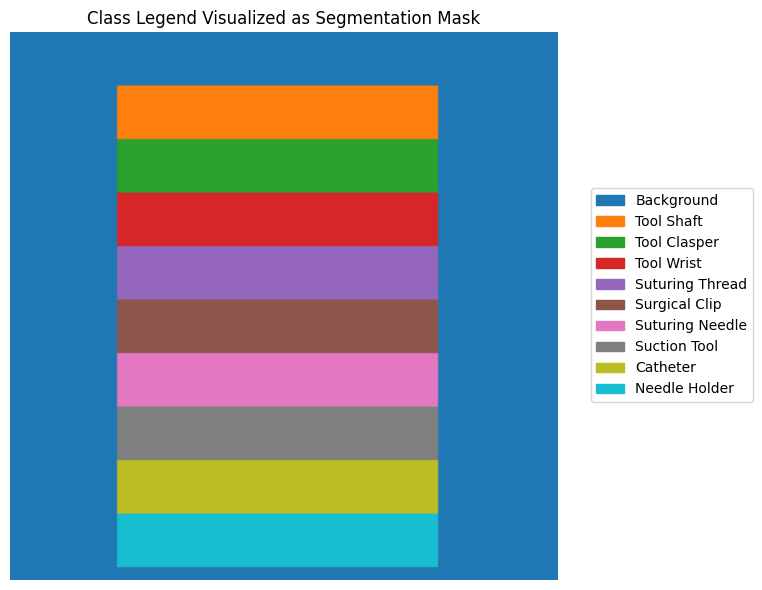

In [3]:
#Visualizing Class Color legend

mask_vis = np.zeros((256, 256), dtype=np.uint8)
for i in range(1, 10):
    mask_vis[25*i:25*(i+1), 50:200] = i

mask_rgb = np.zeros((256, 256, 3), dtype=np.uint8)
for i in range(10):
    mask_rgb[mask_vis == i] = (colors[i][:3] * 255).astype(np.uint8)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(mask_rgb)
ax.set_title("Class Legend Visualized as Segmentation Mask")
ax.axis('off')
fig.legend(handles=leg_pat, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


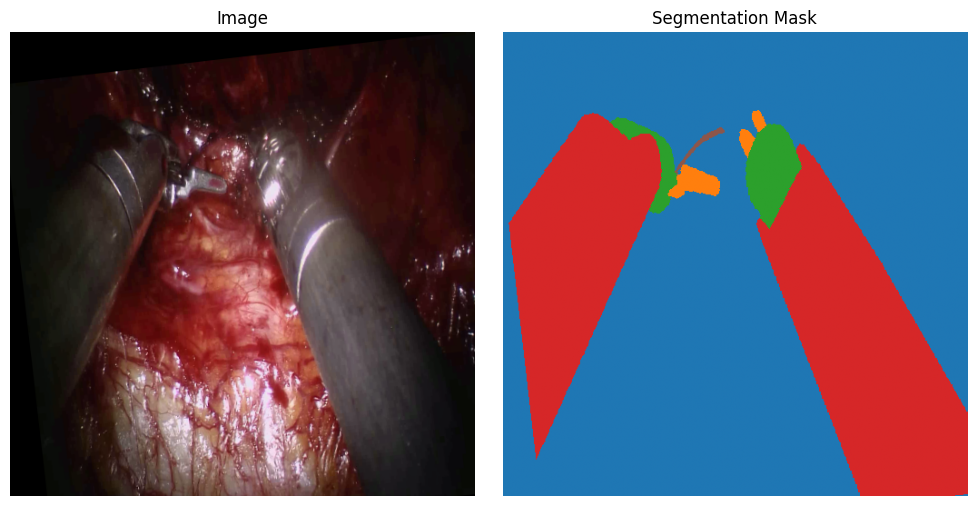

In [4]:
#Visualizing Image + Mask 

img_dir = "data/train/video_01/frames"
msk_dir = "data/train/video_01/segmentation"

ds = SurgicalDataset(img_dir=img_dir, msk_dir=msk_dir, tfm=get_training_augmentations())
img, msk = ds[0]

img_np = denormalize(img)
msk_np = msk.numpy()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_np)
axs[0].set_title("Image")
axs[0].axis('off')

axs[1].imshow(msk_np, cmap='tab10', vmin=0, vmax=9)
axs[1].set_title("Segmentation Mask")
axs[1].axis('off')

plt.tight_layout()
plt.show()


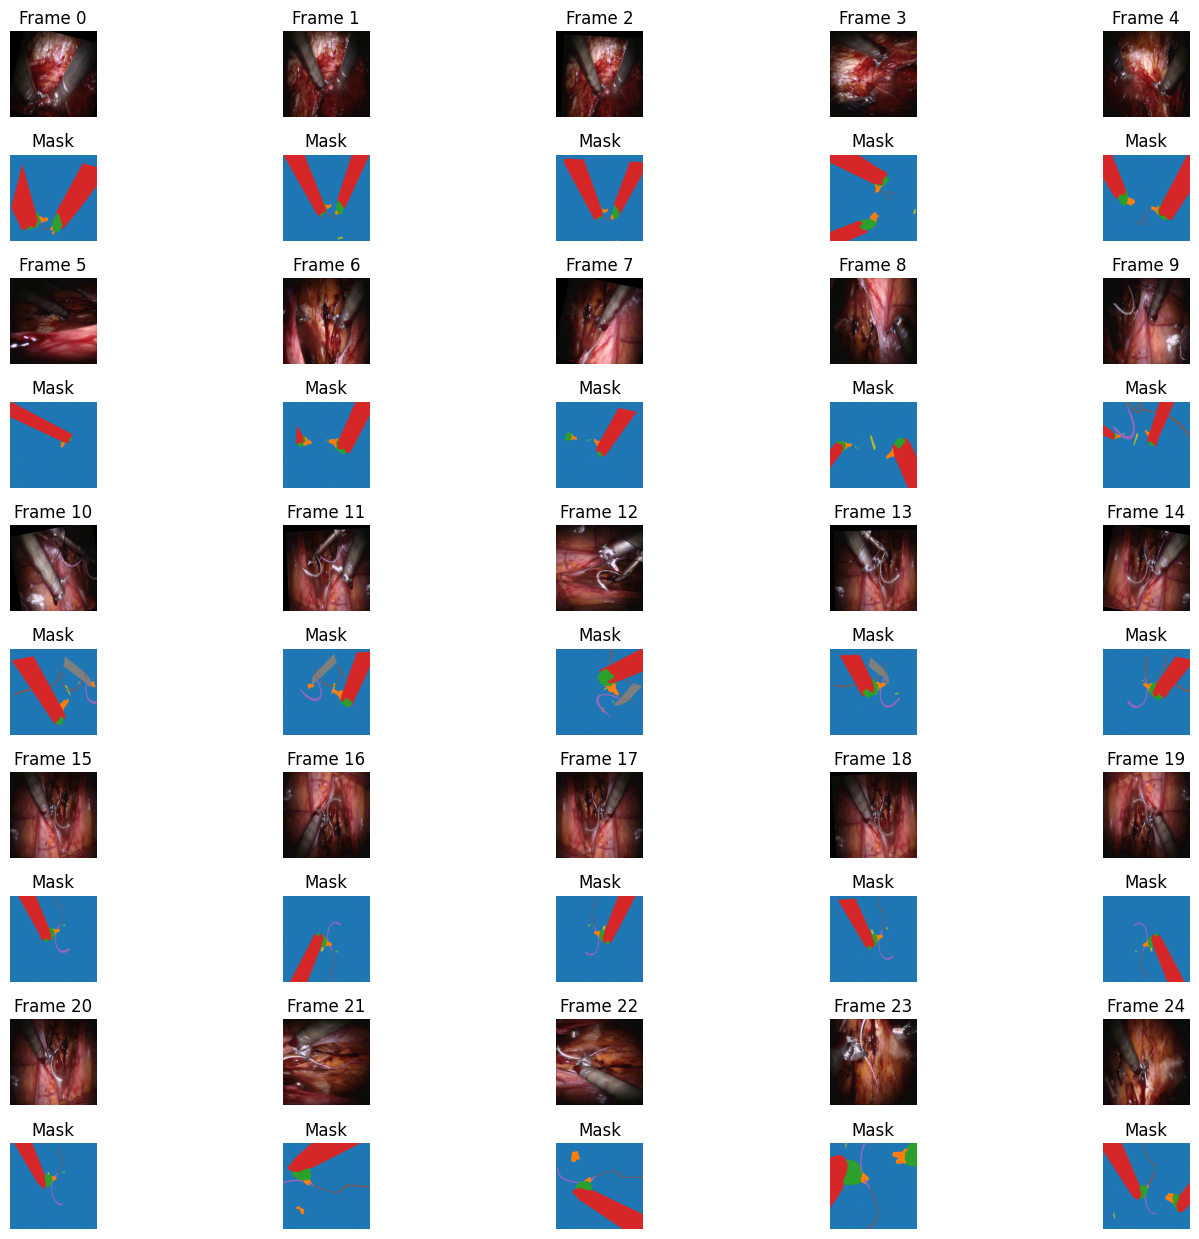

In [5]:
# Visualizing first 25 frames
n = 25
cols = 5
rows = n // cols

fig, axs = plt.subplots(rows * 2, cols, figsize=(cols * 3, rows * 2.5))

for i in range(n):
    img, msk = ds[i]
    img_np = denormalize(img)
    msk_np = msk.numpy()

    axs[2 * (i // cols)][i % cols].imshow(img_np)
    axs[2 * (i // cols)][i % cols].set_title(f"Frame {i}")
    axs[2 * (i // cols)][i % cols].axis('off')

    axs[2 * (i // cols) + 1][i % cols].imshow(msk_np, cmap="tab10", vmin=0, vmax=9)
    axs[2 * (i // cols) + 1][i % cols].set_title("Mask")
    axs[2 * (i // cols) + 1][i % cols].axis('off')

plt.tight_layout()
plt.show()
